In [2]:
#importação das bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np
import geopandas as gpd
import folium

In [3]:
# Carregamento dos dados para análise da extrutura
base_tratada_caminho = '..\\Base de dados\\Base_tratada.csv'

# Leitura dos arquivos CSV de acidentes e empreendimentos
base_tratada_df = pd.read_csv(base_tratada_caminho)
pd.set_option('display.max_columns', None)
base_tratada_df

C:\Users\kaiog\AppData\Local\Temp\ipykernel_14256\718623421.py:5: DtypeWarning: Columns (43,63) have mixed types. Specify dtype option on import or set low_memory=False.
  base_tratada_df = pd.read_csv(base_tratada_caminho)


Unnamed: 0    cod_mdr  cod_operacao  cod_saci  cod_convenio_siafi  \
0                0    1-38001      319910.0   38001.0                 0.0   
1                1    1-38001      319910.0   38001.0                 0.0   
2                2    1-38001      319910.0   38001.0                 0.0   
3                3    1-38001      319910.0   38001.0                 0.0   
4                4    1-38001      319910.0   38001.0                 0.0   
...            ...        ...           ...       ...                 ...   
376749      376749  2-0402954      402954.0       NaN                 0.0   
376750      376750  2-0402954      402954.0       NaN                 0.0   
376751      376751  2-0402954      402954.0       NaN                 0.0   
376752      376752  2-0402954      402954.0       NaN                 0.0   
376753      376753  2-0402954      402954.0       NaN                 0.0   

        cod_ag_operador           origem          dsc_concedente dsc_fonte  \
0              375658.0         PAC_MCID  MINISTERIO DAS CIDADES       FIN   
1              375658.0         PAC_MCID  MINISTERIO DAS CIDADES       FIN   
2              375658.0         PAC_MCID  MINISTERIO DAS CIDADES       FIN   
3              375658.0         PAC_MCID  MINISTERIO DAS CIDADES       FIN   
4              375658.0         PAC_MCID  MINISTERIO DAS CIDADES       FIN   
...                 ...              ...                     ...       ...   
376749              NaN  NPAC_DBGESTORES  MINISTERIO DAS CIDADES       OGU   
376750              NaN  NPAC_DBGESTORES  MINISTERIO DAS CIDADES       OGU   
376751              NaN  NPAC_DBGESTORES  MINISTERIO DAS CIDADES       OGU   
376752              NaN  NPAC_DBGESTORES  MINISTERIO DAS CIDADES       OGU   
376753              NaN  NPAC_DBGESTORES  MINISTERIO DAS CIDADES       OGU   

       dsc_unidade cod_proposta dsc_situacao_contrato_mdr bln_carteira_mdr  \
0            SEMOB          NaN    CONTRATADO - CONCLUIDO              SIM   
1            SEMOB          NaN    CONTRATADO - CONCLUIDO              SIM   
2            SEMOB          NaN    CONTRATADO - CONCLUIDO              SIM   
3            SEMOB          NaN    CONTRATADO - CONCLUIDO              SIM   
4            SEMOB          NaN    CONTRATADO - CONCLUIDO              SIM   
...            ...          ...                       ...              ...   
376749       SEMOB          NaN   CANCELADO OU DISTRATADO              NAO   
376750       SEMOB          NaN   CANCELADO OU DISTRATADO              NAO   
376751       SEMOB          NaN   CANCELADO OU DISTRATADO              NAO   
376752       SEMOB          NaN   CANCELADO OU DISTRATADO              NAO   
376753       SEMOB          NaN   CANCELADO OU DISTRATADO              NAO   

       bln_carteira_mdr_ativo dsc_situacao_objeto_mdr dsc_paralisada_mdr  \
0                         NAO               CONCLUIDA     NAO PARALISADA   
1                         NAO               CONCLUIDA     NAO PARALISADA   
2                         NAO               CONCLUIDA     NAO PARALISADA   
3                         NAO               CONCLUIDA     NAO PARALISADA   
4                         NAO               CONCLUIDA     NAO PARALISADA   
...                       ...                     ...                ...   
376749                    NAO            NAO INICIADA     NAO PARALISADA   
376750                    NAO            NAO INICIADA     NAO PARALISADA   
376751                    NAO            NAO INICIADA     NAO PARALISADA   
376752                    NAO            NAO INICIADA     NAO PARALISADA   
376753                    NAO            NAO INICIADA     NAO PARALISADA   

       bln_ativo bln_ativo_boolean  cod_id_fonte   cod_id_pac programa  acao  \
0              S                 Y        375658        38001  PAC FIN  FGTS   
1              S                 Y        375658        38001  PAC FIN  FGTS   
2              S                 Y        375658        

In [4]:
# Filtrar colunas relevantes
colunas_relevantes = ['mun_LATITUDE_x','mun_LONGITUDE_x','origem', 'dsc_fonte', 'dsc_unidade', 'dsc_situacao_contrato_mdr','uf_SIGLA_UF_x','mun_MUNNOMEX_x',
'vlr_repasse_financiamento','vlr_contrapartida','vlr_desembolsado','vlr_desbloqueado','situacao_obra','vlr_ult_desembolso',
'vlr_ult_repasse_desbloqueado','vlr_ult_contrapartida_desbloqueado','dias_paralisados','emp_gerado','vlr_investimento','vlr_repasse_financiamento_num',
'vlr_contrapartida_num','vlr_investimento_num','vlr_empenhado_num','vlr_desbloqueado_num','Populacao_x','mun_AREA_x','Categoria_emprendimentos',
'Pedestre_mortes','Ciclista_mortes','Motociclista_mortes','Ocup_triciclo_motor_mortes','Ocup_automovel_mortes','Ocup_caminhonete_mortes','Ocup_veic_transp_pesado_mortes',
'Ocup_onibus_mortes','Outros_mortes','total_mortes','taxa_mun_mortes','taxa_mun_pedestre_mortes','taxa_mun_ciclista_mortes','taxa_mun_motociclista_mortes',
'taxa_mun_automovel_mortes','taxa_mun_veiculo_pesado_mortes','taxa_mun_onibus_mortes','taxa_mun_outros_mortes','Pedestre_feridos','Ciclista_feridos','Motociclista_feridos',
'Ocup_triciclo_motor_feridos','Ocup_automovel_feridos','Ocup_caminhonete_feridos','Ocup_veic_transp_pesado_feridos','Ocup_onibus_feridos','Outros_feridos','total_feridos',
'taxa_mun_feridos','taxa_mun_pedestre_feridos','taxa_mun_ciclista_feridos','taxa_mun_motociclista_feridos','taxa_mun_automovel_feridos','taxa_mun_veiculo_pesado_feridos',
'taxa_mun_onibus_feridos','taxa_mun_outros_feridos']

# Filtrar o DataFrame para manter apenas as colunas relevantes
df_filtrado = base_tratada_df[colunas_relevantes]
df_filtrado.dropna()
df_filtrado['vlr_desembolsado'].fillna(df_filtrado['vlr_desembolsado'].mean(), inplace=True)
df_filtrado['vlr_desbloqueado'].fillna(df_filtrado['vlr_desbloqueado'].mean(), inplace=True)
df_filtrado['vlr_ult_desembolso'].fillna(df_filtrado['vlr_ult_desembolso'].mean(), inplace=True)
df_filtrado['vlr_ult_repasse_desbloqueado'].fillna(df_filtrado['vlr_ult_repasse_desbloqueado'].mean(), inplace=True)
df_filtrado['dias_paralisados'].fillna(df_filtrado['dias_paralisados'].mean(), inplace=True)
df_filtrado['Populacao_x'].fillna(df_filtrado['Populacao_x'].mean(), inplace=True)
df_filtrado['mun_AREA_x'].fillna(df_filtrado['mun_AREA_x'].mean(), inplace=True)
df_filtrado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 376754 entries, 0 to 376753
Data columns (total 63 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   mun_LATITUDE_x                      299981 non-null  float64
 1   mun_LONGITUDE_x                     299981 non-null  float64
 2   origem                              376754 non-null  object 
 3   dsc_fonte                           376754 non-null  object 
 4   dsc_unidade                         376754 non-null  object 
 5   dsc_situacao_contrato_mdr           376754 non-null  object 
 6   uf_SIGLA_UF_x                       376754 non-null  object 
 7   mun_MUNNOMEX_x                      375154 non-null  object 
 8   vlr_repasse_financiamento           376754 non-null  float64
 9   vlr_contrapartida                   376754 non-null  float64
 10  vlr_desembolsado                    376754 non-null  float64
 11  vlr_desbloqueado          

C:\Users\kaiog\AppData\Local\Temp\ipykernel_14256\384746401.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado['vlr_desembolsado'].fillna(df_filtrado['vlr_desembolsado'].mean(), inplace=True)
C:\Users\kaiog\AppData\Local\Temp\ipykernel_14256\384746401.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado['vlr_desbloqueado'].fillna(df_filtrado['vlr_desbloqueado'].mean(), inplace=True)
C:\Users\kaiog\AppData\Local\Temp\ipykernel_14256\384746401.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.py

In [5]:
# Codificar todas as colunas categóricas usando get_dummies
df_encoded = pd.get_dummies(df_filtrado, columns=['origem', 'dsc_fonte', 'dsc_unidade', 'dsc_situacao_contrato_mdr', 
                                                  'uf_SIGLA_UF_x', 'mun_MUNNOMEX_x', 'situacao_obra', 'Categoria_emprendimentos'])

# Clusterização dos grupos de empreendimentos em relação aos dados de sinistros

C:\Users\kaiog\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\kaiog\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:110: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\kaiog\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 217, in _count_physical_cores
    raise ValueError(
C:\Users\kaiog\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the 

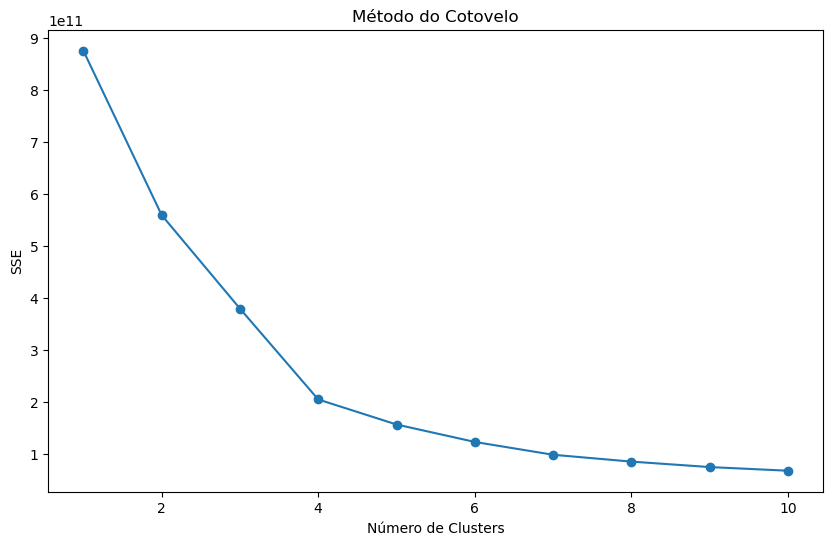

In [6]:
#Método do cotovelo para escolha do número de clusters
clustering_features = ['total_mortes','origem_NPAC_DBGESTORES','dsc_unidade_SEMOB','dsc_fonte_OGU',
                       'situacao_obra_OBJETO CONCLUÍDO','Categoria_emprendimentos_Pavimentação, Drenagem e Saneamento',
                      'Categoria_emprendimentos_Infrestrutura Urbana','Categoria_emprendimentos_Obras para transportes Ativos',
                      'Categoria_emprendimentos_Outros','Categoria_emprendimentos_Projetos Específicos',
                       'Categoria_emprendimentos_Segurança e Acessibilidade','Categoria_emprendimentos_Transporte Público',
                      'Categoria_emprendimentos_Urbanização e Qualificação Urbana','dias_paralisados',
                       'dsc_situacao_contrato_mdr_CONTRATADO - CONCLUIDO','Pedestre_mortes','Motociclista_mortes',
                       'Ocup_automovel_mortes','total_feridos','Ciclista_mortes','Pedestre_feridos','Motociclista_feridos',
                      'Ciclista_feridos','Ocup_automovel_feridos','Outros_mortes']

# Preparar os dados para clusterização
X_clustering = df_encoded[clustering_features].dropna()

sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_clustering)
    sse.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), sse, marker='o')
plt.title('Método do Cotovelo')
plt.xlabel('Número de Clusters')
plt.ylabel('SSE')
plt.show()

In [7]:
# Selecionar variáveis relevantes para a clusterização
clustering_features = ['total_mortes','origem_NPAC_DBGESTORES','dsc_unidade_SEMOB','dsc_fonte_OGU',
                       'situacao_obra_OBJETO CONCLUÍDO','Categoria_emprendimentos_Pavimentação, Drenagem e Saneamento',
                      'Categoria_emprendimentos_Infrestrutura Urbana','Categoria_emprendimentos_Obras para transportes Ativos',
                      'Categoria_emprendimentos_Outros','Categoria_emprendimentos_Projetos Específicos',
                       'Categoria_emprendimentos_Segurança e Acessibilidade','Categoria_emprendimentos_Transporte Público',
                      'Categoria_emprendimentos_Urbanização e Qualificação Urbana','dias_paralisados',
                       'dsc_situacao_contrato_mdr_CONTRATADO - CONCLUIDO','Pedestre_mortes','Motociclista_mortes',
                       'Ocup_automovel_mortes','total_feridos','Ciclista_mortes','Pedestre_feridos','Motociclista_feridos',
                      'Ciclista_feridos','Ocup_automovel_feridos','Outros_mortes']

# Preparar os dados para clusterização
X_clustering = df_encoded[clustering_features].dropna()


# Configurar e treinar o modelo K-means
kmeans_model = KMeans(n_clusters=4, random_state=42)
kmeans_model.fit(X_clustering)

# Adicionar as previsões de clusters ao DataFrame original
df_encoded['Cluster'] = np.nan
df_encoded.loc[X_clustering.index, 'Cluster'] = kmeans_model.labels_

# Retornar a contagem de registros em cada cluster
cluster_counts = df_encoded['Cluster'].value_counts(dropna=True)
cluster_counts

C:\Users\kaiog\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Cluster
0.0    247207
1.0     69083
3.0     57474
2.0      2990
Name: count, dtype: int64

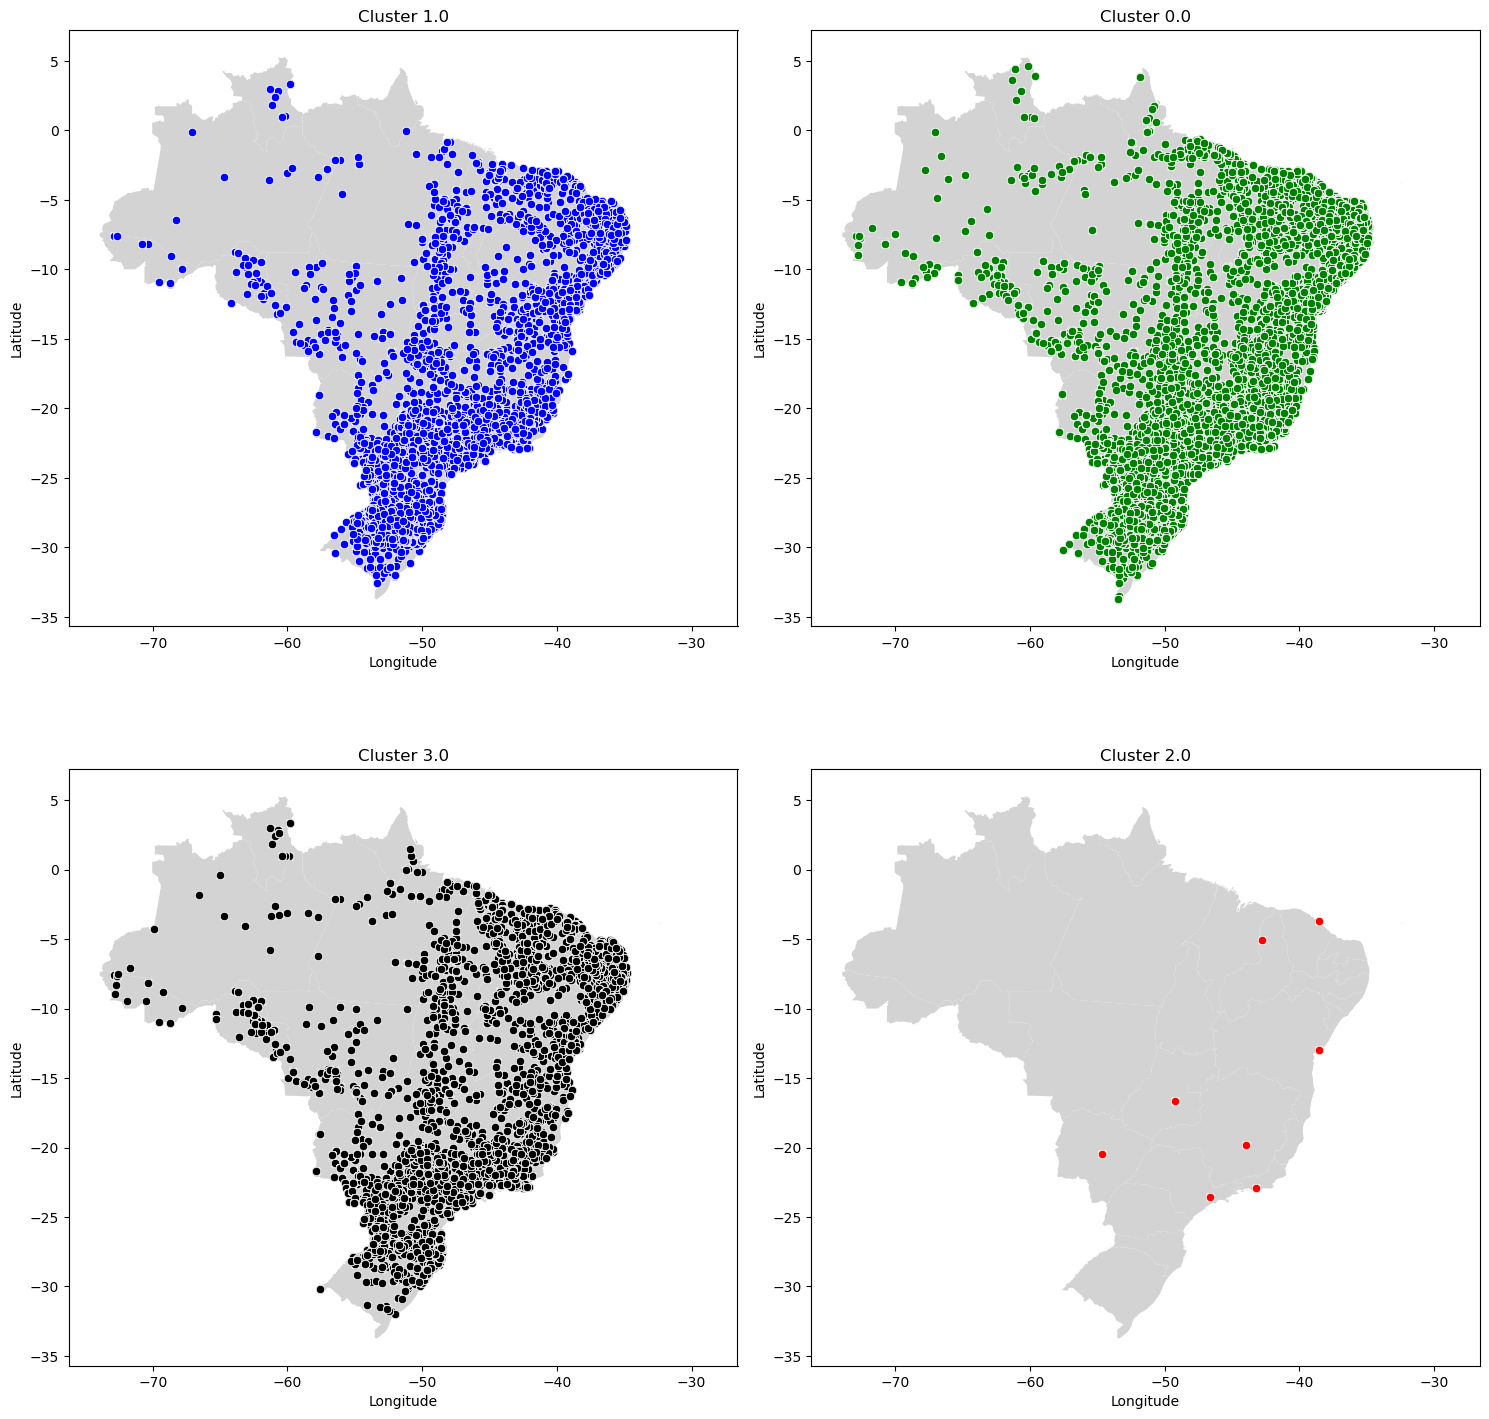

In [8]:
# Carregar o shapefile dos estados
shapefile_path = '..\\shp\\estados\\BR_UF_2022.shp'
gdf_estados = gpd.read_file(shapefile_path)

# Preparar dados com 4 clusters
clusters = df_encoded['Cluster'].unique()
# Definindo cores para cada cluster
colors = ['blue', 'green', 'black', 'red']  

# Criar subplots
fig, axs = plt.subplots(2, 2, figsize=(15, 15))

for ax, cluster, color in zip(axs.ravel(), clusters, colors):
    # Filtrar dados para o cluster atual
    data_cluster = df_encoded[df_encoded['Cluster'] == cluster]

    # Plotar os estados
    gdf_estados.plot(ax=ax, color='lightgrey')

    # Plotar os pontos do cluster
    sns.scatterplot(data=data_cluster, x='mun_LONGITUDE_x', y='mun_LATITUDE_x', color=color, ax=ax)
    
    ax.set_title(f'Cluster {cluster}')
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')

plt.tight_layout()
plt.show()

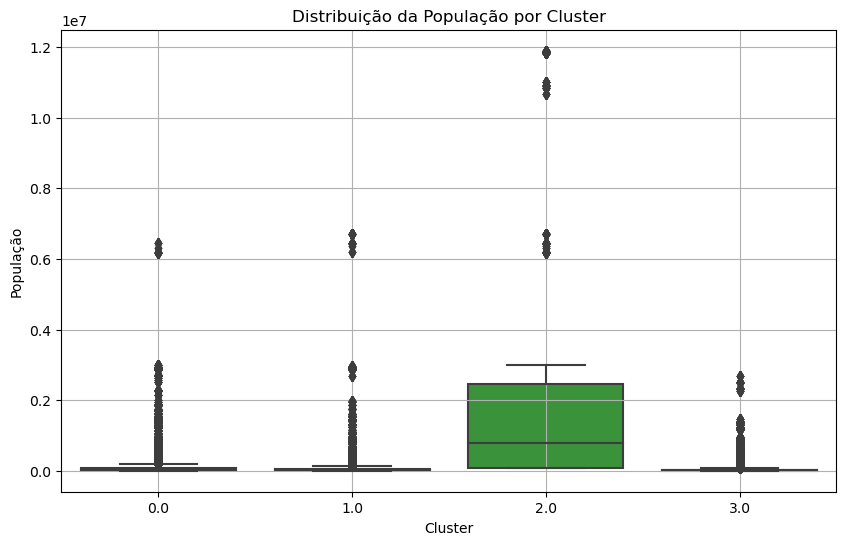

In [9]:
# Boxplot da população por cluster
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_encoded, x='Cluster', y='Populacao_x')
plt.xlabel('Cluster')
plt.ylabel('População')
plt.title('Distribuição da População por Cluster')
plt.grid(True)
plt.show()

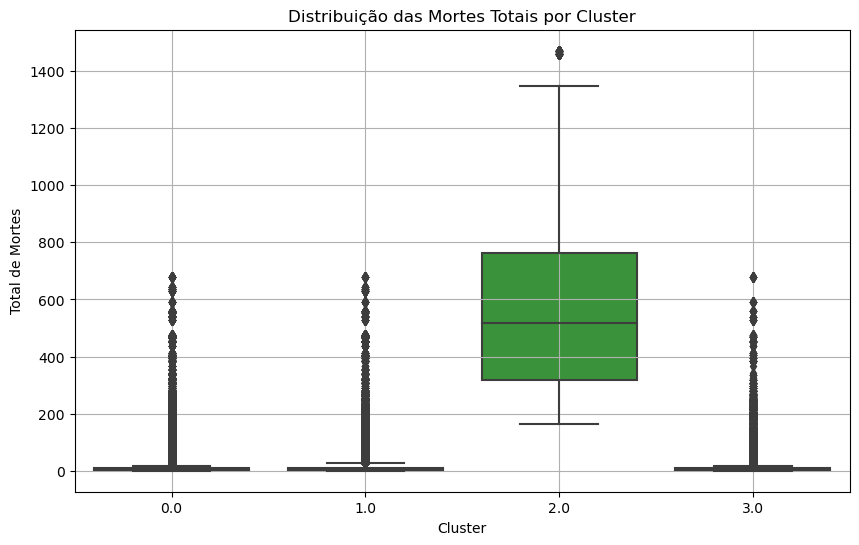

In [10]:
# Boxplot das mortes totais por cluster
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_encoded, x='Cluster', y='total_mortes')
plt.xlabel('Cluster')
plt.ylabel('Total de Mortes')
plt.title('Distribuição das Mortes Totais por Cluster')
plt.grid(True)
plt.show()

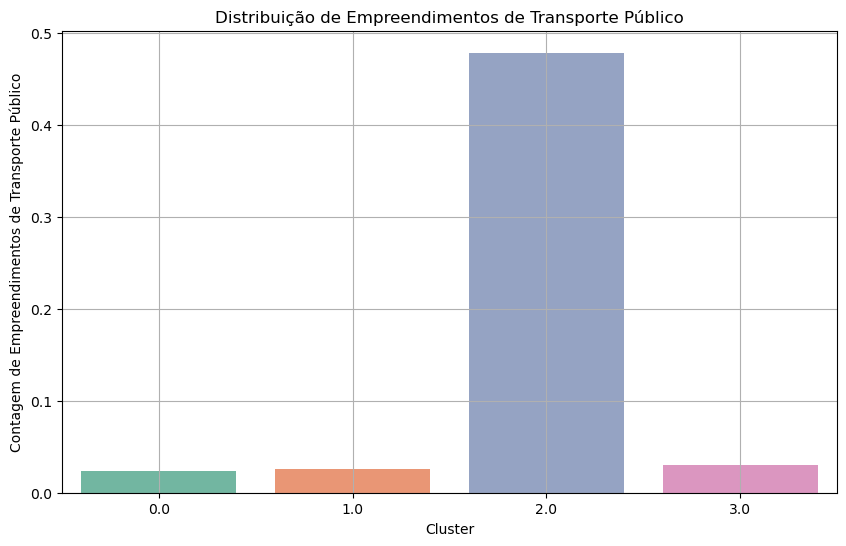

In [11]:
# Contar os valores True em 'Categoria_emprendimentos_Infraestrutura Urbana' para cada cluster
df_encoded['Categoria_emprendimentos_Transporte Público_true'] = df_encoded['Categoria_emprendimentos_Transporte Público'].astype(int)
grouped_data = df_encoded.groupby('Cluster')['Categoria_emprendimentos_Transporte Público_true'].mean().reset_index()

# Gráfico de barras da contagem de empreendimentos de Infraestrutura Urbana por cluster
plt.figure(figsize=(10, 6))
sns.barplot(data=grouped_data, x='Cluster', y='Categoria_emprendimentos_Transporte Público_true', palette='Set2')
plt.xlabel('Cluster')
plt.ylabel('Contagem de Empreendimentos de Transporte Público')
plt.title('Distribuição de Empreendimentos de Transporte Público')
plt.grid(True)
plt.show()

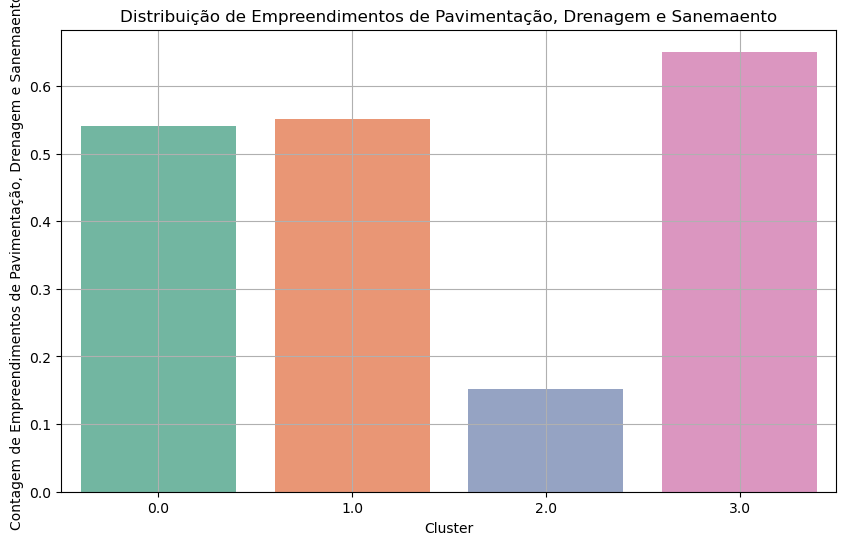

In [12]:
# Contar os valores True em 'Categoria_emprendimentos_Infraestrutura Urbana' para cada cluster
df_encoded['Categoria_emprendimentos_Pavimentação, Drenagem e Saneamento_true'] = df_encoded['Categoria_emprendimentos_Pavimentação, Drenagem e Saneamento'].astype(int)
grouped_data = df_encoded.groupby('Cluster')['Categoria_emprendimentos_Pavimentação, Drenagem e Saneamento_true'].mean().reset_index()

# Gráfico de barras da contagem de empreendimentos de Infraestrutura Urbana por cluster
plt.figure(figsize=(10, 6))
sns.barplot(data=grouped_data, x='Cluster', y='Categoria_emprendimentos_Pavimentação, Drenagem e Saneamento_true', palette='Set2')
plt.xlabel('Cluster')
plt.ylabel('Contagem de Empreendimentos de Pavimentação, Drenagem e Sanemaento')
plt.title('Distribuição de Empreendimentos de Pavimentação, Drenagem e Sanemaento')
plt.grid(True)
plt.show()

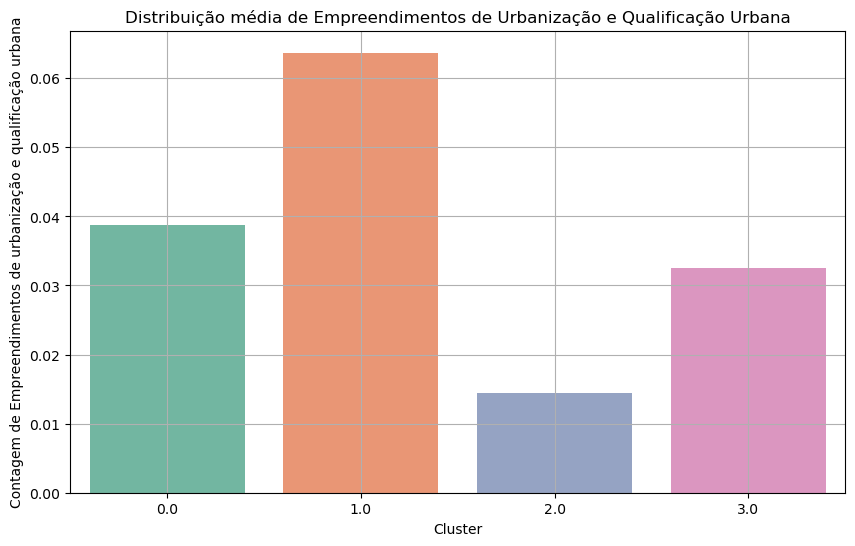

In [13]:
# Contar os valores True em 'Categoria_emprendimentos_Infraestrutura Urbana' para cada cluster
df_encoded['Categoria_emprendimentos_Urbanização e Qualificação Urbana_true'] = df_encoded['Categoria_emprendimentos_Urbanização e Qualificação Urbana'].astype(int)
grouped_data = df_encoded.groupby('Cluster')['Categoria_emprendimentos_Urbanização e Qualificação Urbana_true'].mean().reset_index()

# Gráfico de barras da contagem de empreendimentos de Infraestrutura Urbana por cluster
plt.figure(figsize=(10, 6))
sns.barplot(data=grouped_data, x='Cluster', y='Categoria_emprendimentos_Urbanização e Qualificação Urbana_true', palette='Set2')
plt.xlabel('Cluster')
plt.ylabel('Contagem de Empreendimentos de urbanização e qualificação urbana')
plt.title('Distribuição média de Empreendimentos de Urbanização e Qualificação Urbana')
plt.grid(True)
plt.show()

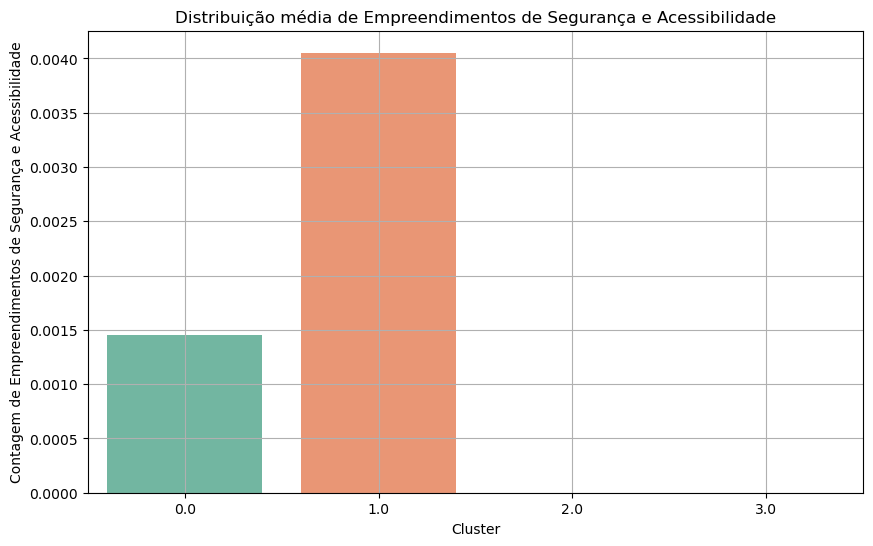

In [14]:
# Contar os valores True em 'Categoria_emprendimentos_Infraestrutura Urbana' para cada cluster
df_encoded['Categoria_emprendimentos_Segurança e Acessibilidade_true'] = df_encoded['Categoria_emprendimentos_Segurança e Acessibilidade'].astype(int)
grouped_data = df_encoded.groupby('Cluster')['Categoria_emprendimentos_Segurança e Acessibilidade_true'].mean().reset_index()

# Gráfico de barras da contagem de empreendimentos de Infraestrutura Urbana por cluster
plt.figure(figsize=(10, 6))
sns.barplot(data=grouped_data, x='Cluster', y='Categoria_emprendimentos_Segurança e Acessibilidade_true', palette='Set2')
plt.xlabel('Cluster')
plt.ylabel('Contagem de Empreendimentos de Segurança e Acessibilidade')
plt.title('Distribuição média de Empreendimentos de Segurança e Acessibilidade')
plt.grid(True)
plt.show()

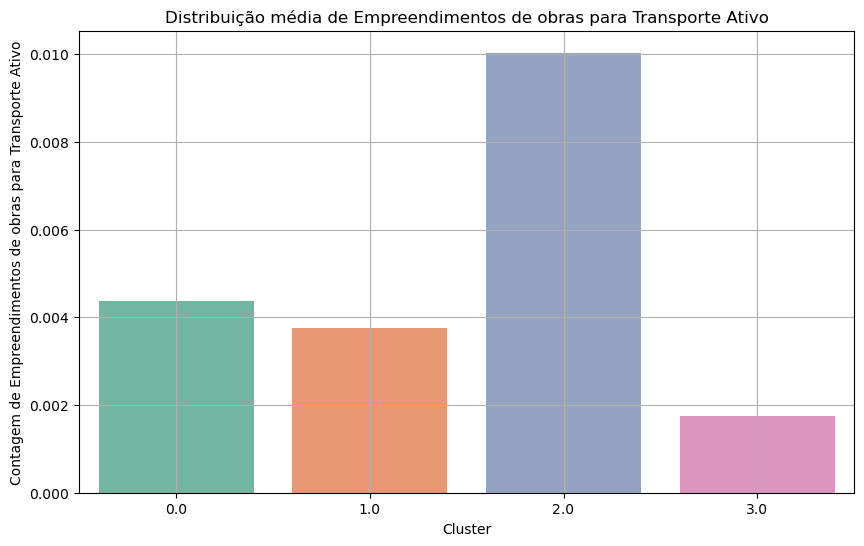

In [15]:
# Contar os valores True em 'Categoria_emprendimentos_Infraestrutura Urbana' para cada cluster
df_encoded['Categoria_emprendimentos_Obras para transportes Ativos_true'] = df_encoded['Categoria_emprendimentos_Obras para transportes Ativos'].astype(int)
grouped_data = df_encoded.groupby('Cluster')['Categoria_emprendimentos_Obras para transportes Ativos_true'].mean().reset_index()

# Gráfico de barras da contagem de empreendimentos de Infraestrutura Urbana por cluster
plt.figure(figsize=(10, 6))
sns.barplot(data=grouped_data, x='Cluster', y='Categoria_emprendimentos_Obras para transportes Ativos_true', palette='Set2')
plt.xlabel('Cluster')
plt.ylabel('Contagem de Empreendimentos de obras para Transporte Ativo')
plt.title('Distribuição média de Empreendimentos de obras para Transporte Ativo')
plt.grid(True)
plt.show()

- Algumas observações sobre as análises:
    -  O Grupo 2 com menor quantidade de pontos no cluster, representa as maiores capitais do País
    -  O cluster 2 tem os menores índices médios por município de investimento em empreendimentos de acessibilidade segurança, urbanização e qualificação, mas os maiores indices de empreendimentos sobre transporte público w transporte ativo
    - O cluster 0 aparesenta ser mais uniforme quanto aos tipos de empreendimentos investidos e está mais espaçado pelo território brasileiro
     - Existe uma relação direta entre o número de mortes e a população. Também pode existir uma relação entre o número de mortes e a menor quantidade de investimento médio por município em empreendimentos de seguranaça, qualificação urbana e pavimentação e drenagem

# Mapa Interativo

In [20]:
df_encoded['Categoria_empreendimentos'] = df_filtrado['Categoria_emprendimentos']
df_encoded

mun_LATITUDE_x  mun_LONGITUDE_x  vlr_repasse_financiamento  \
0               -8.054          -34.881                62211677.65   
1               -8.054          -34.881                62211677.65   
2               -8.054          -34.881                62211677.65   
3               -8.054          -34.881                62211677.65   
4               -8.054          -34.881                62211677.65   
...                ...              ...                        ...   
376749             NaN              NaN                  245850.00   
376750             NaN              NaN                  245850.00   
376751             NaN              NaN                  245850.00   
376752             NaN              NaN                  245850.00   
376753             NaN              NaN                  245850.00   

        vlr_contrapartida  vlr_desembolsado  vlr_desbloqueado  \
0             15708716.86      6.221168e+07      6.221168e+07   
1             15708716.86      6.221168e+07      6.221168e+07   
2             15708716.86      6.221168e+07      6.221168e+07   
3             15708716.86      6.221168e+07      6.221168e+07   
4             15708716.86      6.221168e+07      6.221168e+07   
...                   ...               ...               ...   
376749            5000.00      1.171445e+06      1.214703e+06   
376750            5000.00      1.171445e+06      1.214703e+06   
376751            5000.00      1.171445e+06      1.214703e+06   
376752            5000.00      1.171445e+06      1.214703e+06   
376753            5000.00      1.171445e+06      1.214703e+06   

        vlr_ult_desembolso  vlr_ult_repasse_desbloqueado  \
0            305872.530000                      0.000000   
1            305872.530000                      0.000000   
2            305872.530000                      0.000000   
3            305872.530000                      0.000000   
4            305872.530000                      0.000000   
...                    ...                           ...   
376749       176571.021747                  68804.702013   
376750       176571.021747                  68804.702013   
376751       176571.021747                  68804.702013   
376752       176571.021747                  68804.702013   
376753       176571.021747                  68804.702013   

        vlr_ult_contrapartida_desbloqueado  dias_paralisados  emp_gerado  \
0                                      0.0       1382.000000        1437   
1                                      0.0       1382.000000        1437   
2                                      0.0       1382.000000        1437   
3                                      0.0       1382.000000        1437   
4                                      0.0       1382.000000        1437   
...                                    ...               ...         ...   
376749                                 NaN       4671.910735           6   
376750                                 NaN       4671.910735           6   
376751                                 NaN       4671.910735           6   
376752                                 NaN       4671.910735           6   
376753                                 NaN       4671.910735           6   

        vlr_investimento  vlr_repasse_financiamento_num  \
0            77920394.51                     62200000.0   
1            77920394.51                     62200000.0   
2            77920394.51                     62200000.0   
3            77920394.51                     62200000.0   
4            77920394.51                     62200000.0   
...                  ...                            ...   
376749         250850.00                    245800000.0   
376750         250850.00                    245800000.0   
376751         250850.00                    245800000.0   
376752         250850.00                    245800000.0   
376753         250850.00                    245800000.0   

        vlr_contrapartida_num  vlr_investim

In [41]:
df_f = df_encoded.dropna()

In [42]:
#Pegar uma amostra para mapa menor em renderização
df_f2 = df_f.head(2000)

In [43]:
# Criação do mapa centrado na média das localizações
mapa = folium.Map(location=[df_f2['mun_LATITUDE_x'].mean(), df_f2['mun_LONGITUDE_x'].mean()], zoom_start=6)

# Cores para cada cluster - ajuste de acordo com o número de clusters
colors = ['blue', 'green', 'black', 'red']

# Converter 'Cluster' para inteiros
df_f['Cluster'] = df_f2['Cluster'].astype(int)

# Adicionar marcadores ao mapa
for idx, row in df_f2.iterrows():
    folium.Marker(
        location=[row['mun_LATITUDE_x'], row['mun_LONGITUDE_x']],
        popup=f"Total de Mortes: {row['total_mortes']}<br>Categoria do empreendimento: {row['Categoria_empreendimentos']}",
        tooltip=f"Cluster {row['Cluster']}",
        icon=folium.Icon(color=colors[row['Cluster'] % len(colors)])  # Ajuste para evitar erros de índice
    ).add_to(mapa)

# Salvar o mapa como um arquivo HTML
mapa.save('mapa_acidentes_clusters_amostra2.html')

C:\Users\kaiog\AppData\Local\Temp\ipykernel_14256\4013258580.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_f['Cluster'] = df_f2['Cluster'].astype(int)
